In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# import 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_excel(r'D:\MSc Software and AI\Team Project\TurbineTeamProject\data\dundalk_2020.xlsx')

In [4]:
turbine_cols = ['Pitch', 'GenRPM', 'RotorRPM', 'EnvirTemp', 'NacelTemp', 'GearOilTemp',
       'GearBearTemp', 'GenTemp', 'GenPh1Temp', 'GenPh2Temp', 'GenPh3Temp',
       'GenBearTemp']
df = df.drop(turbine_cols, axis = 1)
df.set_index(['Timestamps'], inplace= True)
df.head()

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
Timestamps,,,,,,,,,
2020-01-01 00:00:00,2.4,0.4,153.7,-6.6,-0.7,-0.5,-4.5,0.6,-0.7
2020-01-01 00:10:00,2.8,0.6,164.0,4.1,-0.8,-0.5,-4.5,0.6,-0.8
2020-01-01 00:20:00,2.8,0.5,175.5,5.6,-0.8,-0.5,-4.5,0.6,-0.8
2020-01-01 00:30:00,2.6,0.4,188.6,4.5,-0.9,-0.5,-4.4,0.6,-0.8
2020-01-01 00:40:00,2.7,0.4,201.0,4.2,-0.7,-0.5,-4.5,0.5,-0.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10097 entries, 2020-01-01 00:00:00 to 2020-03-12 12:20:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WindSpeed        10097 non-null  float64
 1   StdDevWindSpeed  10097 non-null  float64
 2   WindDirAbs       10097 non-null  float64
 3   WindDirRel       10097 non-null  float64
 4   Power            10097 non-null  float64
 5   MaxPower         10097 non-null  float64
 6   MinPower         10097 non-null  float64
 7   StdDevPower      10097 non-null  float64
 8   AvgRPow          10097 non-null  float64
dtypes: float64(9)
memory usage: 788.8 KB


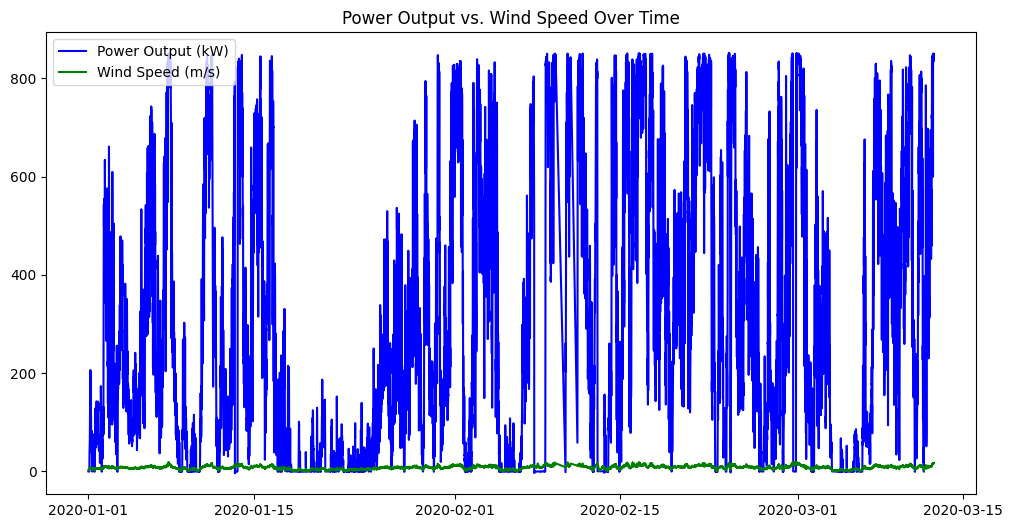

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Power'], label="Power Output (kW)", color='blue')
plt.plot(df['WindSpeed'], label="Wind Speed (m/s)", color='green')
plt.legend()
plt.title("Power Output vs. Wind Speed Over Time")
plt.show()

In [13]:
minmax = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns] = minmax.fit_transform(df)

In [14]:
df_scaled

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
Timestamps,,,,,,,,,
2020-01-01 00:00:00,0.117021,0.090909,0.427419,0.477737,0.004209,0.003445,0.049496,0.001437,0.521739
2020-01-01 00:10:00,0.138298,0.136364,0.456062,0.507701,0.004092,0.003445,0.049496,0.001437,0.510870
2020-01-01 00:20:00,0.138298,0.113636,0.488042,0.511901,0.004092,0.003445,0.049496,0.001437,0.510870
2020-01-01 00:30:00,0.127660,0.090909,0.524472,0.508821,0.003975,0.003445,0.049609,0.001437,0.510870
2020-01-01 00:40:00,0.132979,0.090909,0.558954,0.507981,0.004209,0.003445,0.049496,0.001197,0.521739
...,...,...,...,...,...,...,...,...,...
2020-03-12 11:40:00,0.861702,0.659091,0.694105,0.491739,0.996843,0.989343,0.747990,0.058908,0.597826
2020-03-12 11:50:00,0.829787,0.704545,0.691880,0.504341,0.984684,0.981593,0.694869,0.126676,0.597826
2020-03-12 12:00:00,0.797872,0.636364,0.687152,0.499580,0.992517,0.982670,0.696115,0.089080,0.597826


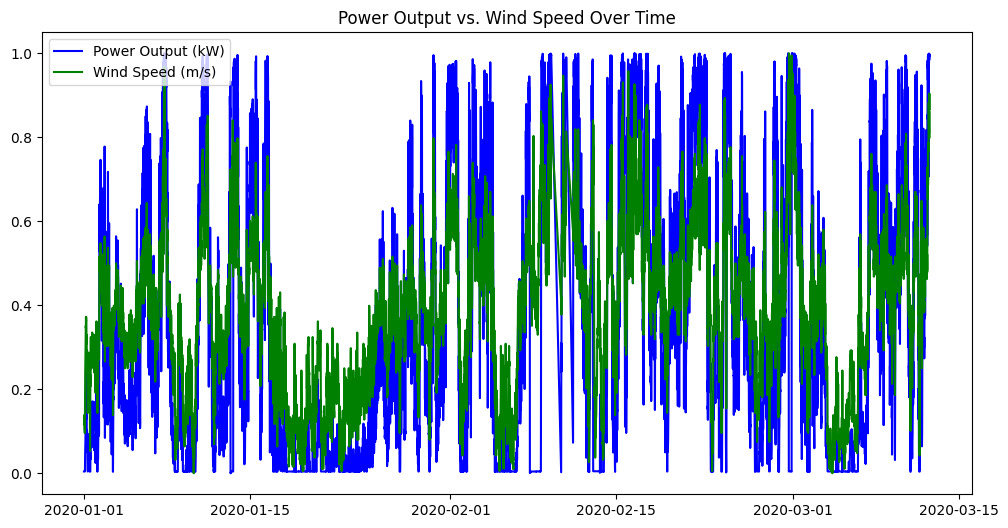

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_scaled['Power'], label="Power Output (kW)", color='blue')
plt.plot(df_scaled['WindSpeed'], label="Wind Speed (m/s)", color='green')
plt.legend()
plt.title("Power Output vs. Wind Speed Over Time")
plt.show()

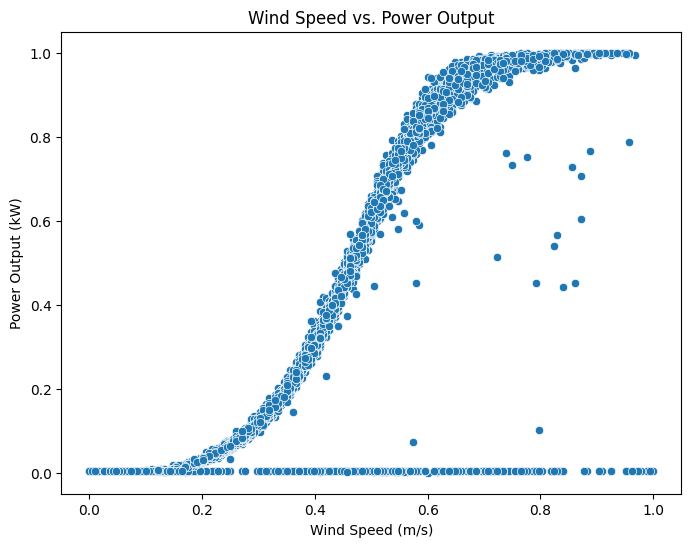

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled['WindSpeed'], y=df_scaled['Power'])
plt.title("Wind Speed vs. Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.show()


So Any Power geneartion is happenig for wind speeds above 2m/s. A linear trend between wind speed and Power above 2m/s

In [20]:
df_Feb= df_scaled.loc['2020-02-01': '2020-02-02']
# Data for 1st and 2nd feb

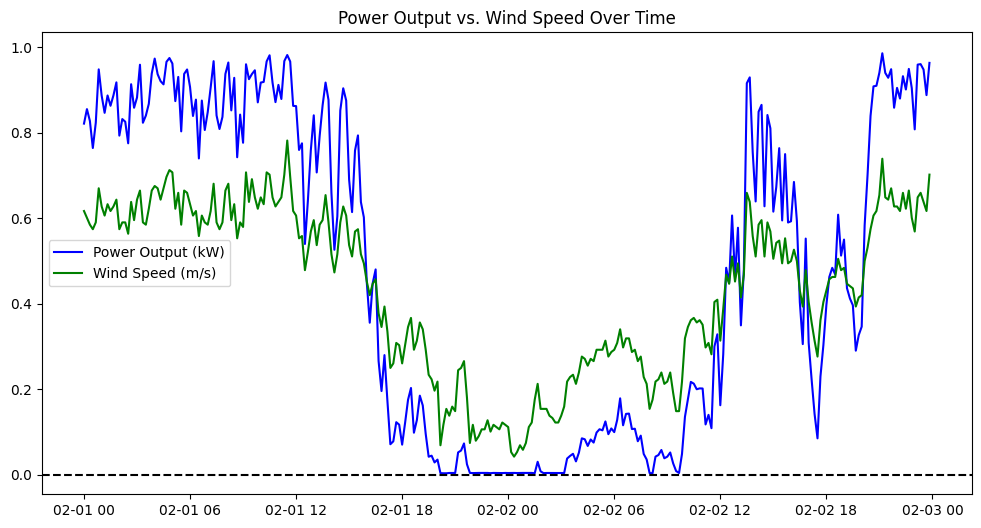

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_Feb['Power'], label="Power Output (kW)", color='blue')
plt.plot(df_Feb['WindSpeed'], label="Wind Speed (m/s)", color='green')
plt.axhline(y=0, color='black', linestyle='--')  # Reference line at 0 kW
plt.legend()
plt.title("Power Output vs. Wind Speed Over Time")
plt.show()

In [19]:
df_Feb

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
Timestamps,,,,,,,,,
2020-02-01 00:00:00,11.8,2.3,241.2,3.2,698.3,905.5,256.4,186.7,0.0
2020-02-01 00:10:00,11.5,1.8,243.4,3.7,727.3,904.5,409.5,123.5,0.0
2020-02-01 00:20:00,11.2,1.6,246.2,1.1,703.6,908.2,328.2,133.4,0.0
2020-02-01 00:30:00,11.0,1.7,242.5,-2.5,649.5,904.8,323.5,135.2,0.0
2020-02-01 00:40:00,11.3,1.8,246.7,-0.1,700.0,908.4,238.9,178.2,0.0
...,...,...,...,...,...,...,...,...,...
2020-02-02 23:10:00,12.4,1.2,258.3,4.1,816.3,902.8,454.5,74.4,0.0
2020-02-02 23:20:00,12.6,1.4,266.2,3.4,817.3,903.5,526.5,75.2,0.0
2020-02-02 23:30:00,12.2,1.3,268.6,1.7,806.4,903.7,560.9,75.4,0.0


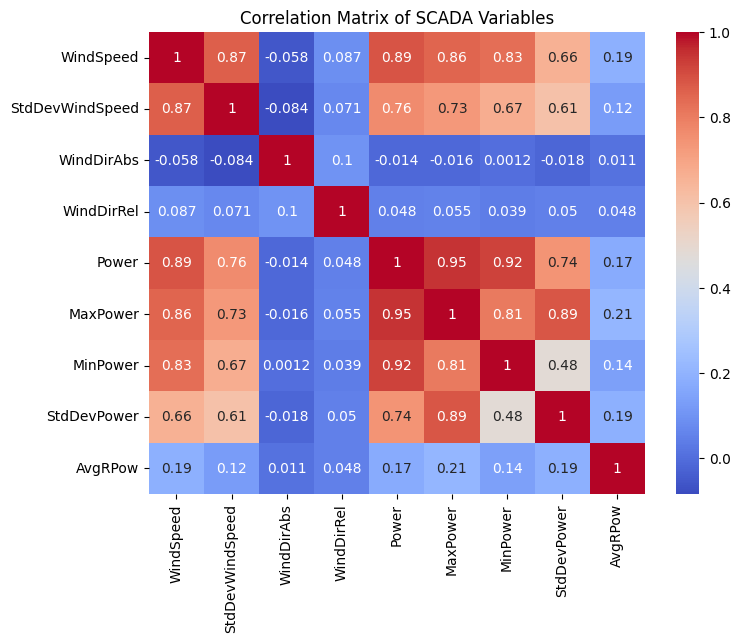

In [24]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of SCADA Variables")
plt.show()

In [37]:


result = adfuller(df_scaled['Power'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # If p < 0.05, data is stationary


ADF Statistic: -8.982415056541138
p-value: 7.250052592732711e-15


In [39]:
df_scaled['Power_diff1'] = df_scaled['Power'].diff().dropna()

In [42]:

result = adfuller(df_scaled['Power_diff1'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # If p < 0.05, data is stationary


ADF Statistic: -37.50164383359244
p-value: 0.0


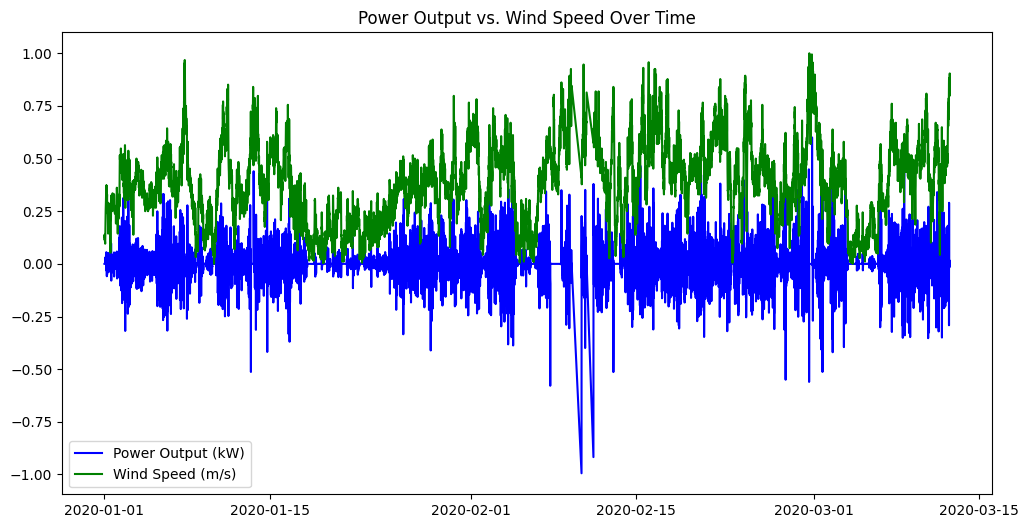

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df_scaled['Power_diff1'].dropna(), label="Power Output (kW)", color='blue')
plt.plot(df_scaled['WindSpeed'], label="Wind Speed (m/s)", color='green')
plt.legend()
plt.title("Power Output vs. Wind Speed Over Time")
plt.show()

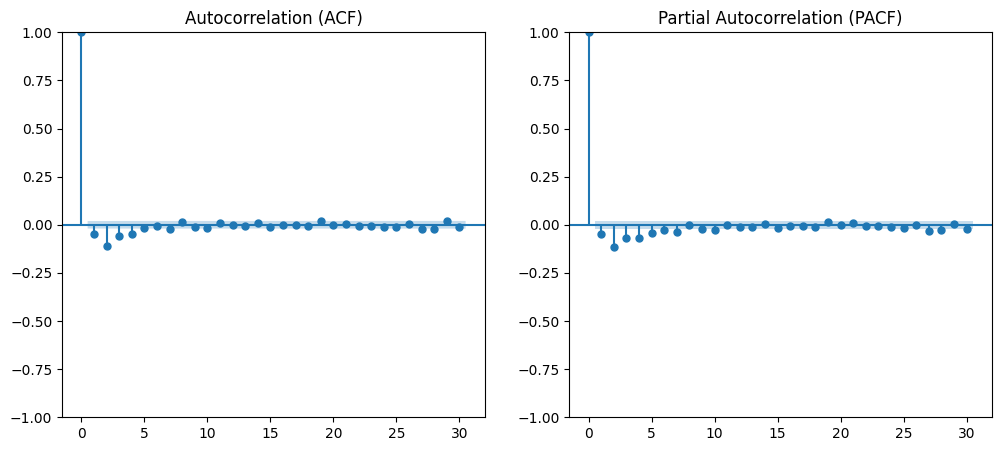

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_scaled['Power_diff1'].dropna(), lags=30, ax=axes[0])  # ACF Plot
axes[0].set_title("Autocorrelation (ACF)")

plot_pacf(df_scaled['Power_diff1'].dropna(), lags=30, ax=axes[1])  # PACF Plot
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()

In [55]:
df_scaled.head()

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,Power_diff1,Power_diff2,predictions
Timestamps,,,,,,,,,,,,
2020-01-01 00:00:00,0.117021,0.090909,0.427419,0.477737,0.004209,0.003445,0.049496,0.001437,0.521739,NaN,NaN,NaN
2020-01-01 00:10:00,0.138298,0.136364,0.456062,0.507701,0.004092,0.003445,0.049496,0.001437,0.510870,-0.000117,NaN,NaN
2020-01-01 00:20:00,0.138298,0.113636,0.488042,0.511901,0.004092,0.003445,0.049496,0.001437,0.510870,0.000000,0.000117,NaN
2020-01-01 00:30:00,0.127660,0.090909,0.524472,0.508821,0.003975,0.003445,0.049609,0.001437,0.510870,-0.000117,-0.000117,NaN
2020-01-01 00:40:00,0.132979,0.090909,0.558954,0.507981,0.004209,0.003445,0.049496,0.001197,0.521739,0.000234,0.000351,NaN


In [58]:
df_scaled = df_scaled.drop(['predictions'], axis =1)

In [59]:
df_scaled

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,Power_diff1,Power_diff2
Timestamps,,,,,,,,,,,
2020-01-01 00:00:00,0.117021,0.090909,0.427419,0.477737,0.004209,0.003445,0.049496,0.001437,0.521739,NaN,NaN
2020-01-01 00:10:00,0.138298,0.136364,0.456062,0.507701,0.004092,0.003445,0.049496,0.001437,0.510870,-0.000117,NaN
2020-01-01 00:20:00,0.138298,0.113636,0.488042,0.511901,0.004092,0.003445,0.049496,0.001437,0.510870,0.000000,0.000117
2020-01-01 00:30:00,0.127660,0.090909,0.524472,0.508821,0.003975,0.003445,0.049609,0.001437,0.510870,-0.000117,-0.000117
2020-01-01 00:40:00,0.132979,0.090909,0.558954,0.507981,0.004209,0.003445,0.049496,0.001197,0.521739,0.000234,0.000351
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12 11:40:00,0.861702,0.659091,0.694105,0.491739,0.996843,0.989343,0.747990,0.058908,0.597826,0.016602,0.032971
2020-03-12 11:50:00,0.829787,0.704545,0.691880,0.504341,0.984684,0.981593,0.694869,0.126676,0.597826,-0.012159,-0.028762
2020-03-12 12:00:00,0.797872,0.636364,0.687152,0.499580,0.992517,0.982670,0.696115,0.089080,0.597826,0.007834,0.019993


In [1]:
# train_size = int(len(df_scaled) * 0.95)

train_data = df_scaled.loc['2020-01-01':'2020-01-31']
test_data = df_scaled.loc['2020-02-01':'2020-02-02']


NameError: name 'df_scaled' is not defined

In [2]:
train_data.index

NameError: name 'train_data' is not defined

In [127]:
train_data

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,Power_diff1,Power_diff2
Timestamps,,,,,,,,,,,
2020-01-01 00:00:00,0.117021,0.090909,0.427419,0.477737,0.004209,0.003445,0.049496,0.001437,0.521739,NaN,NaN
2020-01-01 00:10:00,0.138298,0.136364,0.456062,0.507701,0.004092,0.003445,0.049496,0.001437,0.510870,-0.000117,NaN
2020-01-01 00:20:00,0.138298,0.113636,0.488042,0.511901,0.004092,0.003445,0.049496,0.001437,0.510870,0.000000,0.000117
2020-01-01 00:30:00,0.127660,0.090909,0.524472,0.508821,0.003975,0.003445,0.049609,0.001437,0.510870,-0.000117,-0.000117
2020-01-01 00:40:00,0.132979,0.090909,0.558954,0.507981,0.004209,0.003445,0.049496,0.001197,0.521739,0.000234,0.000351
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 23:10:00,0.531915,0.454545,0.688265,0.499020,0.657547,0.976964,0.290067,0.465757,0.597826,-0.111306,0.012627
2020-01-31 23:20:00,0.569149,0.454545,0.674360,0.492019,0.767918,0.970398,0.325745,0.443966,0.597826,0.110371,0.221677
2020-01-31 23:30:00,0.563830,0.454545,0.667408,0.493699,0.736701,0.975027,0.309435,0.445402,0.597826,-0.031217,-0.141588


In [136]:
train_X, train_y = train_data[['WindSpeed']], train_data['Power']
test_X, test_y = test_data[['WindSpeed']], test_data['Power']

In [137]:
test_y

Timestamps
2020-02-01 00:00:00    0.821466
2020-02-01 00:10:00    0.855372
2020-02-01 00:20:00    0.827663
2020-02-01 00:30:00    0.764410
2020-02-01 00:40:00    0.823454
                         ...   
2020-02-02 23:10:00    0.959429
2020-02-02 23:20:00    0.960599
2020-02-02 23:30:00    0.947855
2020-02-02 23:40:00    0.888109
2020-02-02 23:50:00    0.963522
Name: Power, Length: 288, dtype: float64

In [173]:
# Define SARIMAX model (ARIMA + wind speed as exogenous variable)
p=2
q=1
model = SARIMAX(train_y, exog=train_X, order=(p, 1, q))

# Fit model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Power   No. Observations:                 4464
Model:               SARIMAX(2, 1, 1)   Log Likelihood                8049.782
Date:                Thu, 13 Feb 2025   AIC                         -16089.565
Time:                        16:45:43   BIC                         -16057.547
Sample:                    01-01-2020   HQIC                        -16078.278
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WindSpeed      1.4593      0.008    190.214      0.000       1.444       1.474
ar.L1          0.7806      0.023     34.165      0.000       0.736       0.825
ar.L2         -0.0626      0.009     -6.794      0.0

In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Use actual timestamps for start and end
start_date = test_y.index[0]  # First timestamp of test data
end_date = test_y.index[-1]   # Last timestamp of test data

# Make predictions using the actual timestamps
predictions = model_fit.predict(start=start_date, end=end_date, exog=test_X)

# Evaluate performance
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
mpe = mean_absolute_percentage_error(test_y, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"mean_absolute_percentage_error: {mpe}")



Mean Absolute Error (MAE): 0.12906158596567094
Root Mean Squared Error (RMSE): 0.16876771559419232
mean_absolute_percentage_error: 5.5903743877619565


In [175]:
predictions_df = pd.DataFrame({'timestamp': test_y.index, 'predicted_power': predictions})
predictions_df.set_index('timestamp', inplace=True)
print(predictions_df.head())



                     predicted_power
timestamp                           
2020-02-01 00:00:00         0.886126
2020-02-01 00:10:00         0.857952
2020-02-01 00:20:00         0.830925
2020-02-01 00:30:00         0.812787
2020-02-01 00:40:00         0.834268


In [176]:
predictions_df.head()

,predicted_power
timestamp,
2020-02-01 00:00:00,0.886126
2020-02-01 00:10:00,0.857952
2020-02-01 00:20:00,0.830925
2020-02-01 00:30:00,0.812787
2020-02-01 00:40:00,0.834268


In [177]:
test_y.head()

Timestamps
2020-02-01 00:00:00    0.821466
2020-02-01 00:10:00    0.855372
2020-02-01 00:20:00    0.827663
2020-02-01 00:30:00    0.764410
2020-02-01 00:40:00    0.823454
Name: Power, dtype: float64

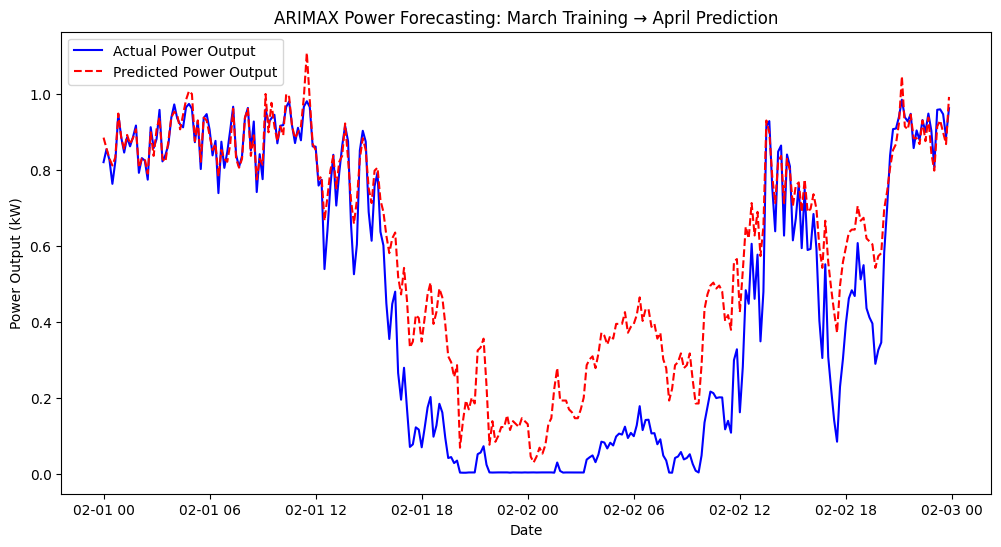

In [178]:
plt.figure(figsize=(12,6))

# Plot actual test data
plt.plot(test_y.index, test_y, label="Actual Power Output", color="blue")

# Plot predicted data
plt.plot(predictions_df.index, predictions_df['predicted_power'], label="Predicted Power Output", 
         color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Power Output (kW)")
plt.title("ARIMAX Power Forecasting: March Training → April Prediction")
plt.legend()
plt.show()


In [172]:
import pmdarima as pm
# Use auto_arima to find the best p, d, q values
auto_model = pm.auto_arima(train_y, exogenous=train_X, seasonal=False, stepwise=True, trace=True)

# Print summary of the model
print(auto_model.summary())

# Extract the best (p, d, q) values from the auto_arima model
best_p, best_d, best_q = auto_model.order
print(f"Best p: {best_p}, Best d: {best_d}, Best q: {best_q}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11310.978, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11310.452, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11310.823, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11312.939, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11419.755, Time=2.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11446.263, Time=2.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11352.700, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11444.501, Time=3.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11445.634, Time=1.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-11364.989, Time=1.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11403.802, Time=3.98 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-11448.155, Time=1.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11421.637, Time=0.81 sec
 ARIMA(2,1,0

In [152]:
# Print summary of the model
print(auto_model.summary())

# Extract the best (p, d, q) values from the auto_arima model
best_p, best_d, best_q = auto_model.order
print(f"Best p: {best_p}, Best d: {best_d}, Best q: {best_q}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4464
Model:               SARIMAX(2, 1, 1)   Log Likelihood                5728.077
Date:                Thu, 13 Feb 2025   AIC                         -11448.155
Time:                        16:40:34   BIC                         -11422.541
Sample:                    01-01-2020   HQIC                        -11439.126
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7723      0.023     32.907      0.000       0.726       0.818
ar.L2         -0.0898      0.011     -8.492      0.000      -0.111      -0.069
ma.L1         -0.8176      0.023    -35.587      0.0